<a href="https://colab.research.google.com/github/ShaheryarRafique/machine-learning/blob/main/implementing_kNN_classifier_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will use Pandas, NumPy, Matplotlib, and other standard Python libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
import logging
from datetime import datetime

Import the CSV

In [ ]:
# Read the file using readlines() and remove any leading/trailing whitespace
with open('sample_data/stop_words.txt', 'r') as file:
    stop_words = file.read().splitlines()

print(stop_words)

['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 't

In [ ]:
data = pd.read_csv('sample_data/apple_sentiment_tweets.csv')

In [ ]:
# Function to clean the text
def clean_text(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
  text = text.translate(str.maketrans('', '', string.punctuation))
  text_tokens = text.split()
  text = ' '.join([word for word in text_tokens if word not in stop_words and len(word) > 1])
  return text

In [ ]:
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4,-1
1,What Happened To Apple Inc? http://t.co/FJEXI3oP0U #aapl #apple @MoneyPress http://t.co/wXKmmTMArW,0
2,Thank u @apple I can now compile all of the pics that i communicate with in one place http://t.co/tq1lo09oyA,1
3,The oddly uplifting story of the Apple co-founder who sold his stake for $800 \r\n$AAPL #aapl\r\nhttp://t.co/CiZbVR05PJ,0
4,@apple can i exchange my iphone for a different color lmao i changed my mind,0


In [ ]:
# Apply cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

# Shuffle the data randomly in-place
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
split_index = int(0.8 * len(shuffled_data))
train_data = shuffled_data[:split_index]
test_data = shuffled_data[split_index:]

In [ ]:
print("Training Data:", train_data.info())
print("Testing Data:", test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1304 non-null   object
 1   sentiment     1304 non-null   int64 
 2   cleaned_text  1304 non-null   object
dtypes: int64(1), object(2)
memory usage: 30.7+ KB
Training Data: None
Testing Data:                                                                                                                                             text  \
1304                                                           Apple Inc. Weekly Roundup: Facebook Ads &amp; iPad 4 http://t.co/1YrNUvCJel #AAPL   
1305  @apple is laughing its pants off with the school programs here in Australia. They even manage to wringe money out of the poorest of people   
1306     @stevewoz @Outback Personally I am excited about @apple projects like 0 gravity and things in development even though  I only own iPod.   
1307   

In [ ]:
#Look at the types of column and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1630 non-null   object
 1   sentiment     1630 non-null   int64 
 2   cleaned_text  1630 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.3+ KB


In [ ]:
#Look at the number of null rows sum
data.isna().sum()

,0
text,0
sentiment,0
cleaned_text,0


In [ ]:
# Get a list of all words in the training data
train_words = ' '.join(train_data['cleaned_text']).split()

# Get unique words from the training data (vocabulary)
vocabulary = list(set(train_words))
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}

In [ ]:
def get_bow_representation(text):
    bow_vector = np.zeros(len(vocabulary), dtype=np.float64)
    # print(f"Text : {text}, bow_vector : {bow_vector}")
    for word in text.split():
        if word in word_to_index:  # Only consider words in the vocabulary
            index = word_to_index[word]
            bow_vector[index] += 1
    # print(f"Text : {text}, bow_vector : {bow_vector}")
    return bow_vector

In [ ]:
# Create BoW representations
train_data['bow'] = train_data['cleaned_text'].apply(get_bow_representation)
test_data['bow'] = test_data['cleaned_text'].apply(get_bow_representation)

<ipython-input-105-19fcc3f68b05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bow'] = train_data['cleaned_text'].apply(get_bow_representation)
<ipython-input-105-19fcc3f68b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['bow'] = test_data['cleaned_text'].apply(get_bow_representation)


In [ ]:
train_data.isna().sum()

,0
text,0
sentiment,0
cleaned_text,0
bow,0


In [ ]:
test_data.isna().sum()

,0
text,0
sentiment,0
cleaned_text,0
bow,0


In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# Function to calculate Manhattan distance
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [ ]:
# k-NN Classifier Function
def knn_classifier(train_data, test_instance, k, distance_metric='euclidean'):
    distances = []

    for index, train_instance in train_data.iterrows():

        # Extract BoW features for the training instance
        train_features = train_instance['bow'] # Convert to numpy array

        # Calculate distance based on the specified metric
        if distance_metric == 'euclidean':
            dist = euclidean_distance(test_instance, train_features)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(test_instance, train_features)
        else:
            raise ValueError("Invalid distance metric. Use 'euclidean' or 'manhattan'.")

        # Append the distance and the corresponding label
        distances.append((dist, train_instance['sentiment']))

    # Sort distances in ascending order
    distances.sort(key=lambda x: x[0])

    # Get the k closest labels
    k_nearest_labels = [label for _, label in distances[:k]]

    # Return the most frequent label (sentiment) among the k nearest neighbors
    counts = Counter(k_nearest_labels)
    if len(counts) > 1 and k % 2 == 0 and len(set(counts.values())) == 1:
      return knn_classifier(train_data, test_instance, k - 1, distance_metric)

    return counts.most_common(1)[0][0]

In [ ]:
test_sample = test_data.iloc[0]
pd.set_option('display.max_colwidth', None)
print("Test Sample Text:", test_sample['text'])
print("Actual Sentiment:", test_sample['sentiment'])

Test Sample Text: Apple Inc. Weekly Roundup: Facebook Ads &amp; iPad 4 http://t.co/1YrNUvCJel #AAPL
Actual Sentiment: 0


In [ ]:
test_instance_bow = test_sample['bow']
print(test_instance_bow)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Make prediction
k = 4
predicted_sentiment = knn_classifier(train_data, test_instance_bow, k)
print("Predicted Sentiment using euclidean:", predicted_sentiment)

Predicted Sentiment using euclidean: 0


In [ ]:
# Make prediction
k = 5
predicted_sentiment = knn_classifier(train_data, test_instance_bow, k, "manhattan")
print("Predicted Sentiment using manhattan:", predicted_sentiment)

Predicted Sentiment using manhattan: 0


In [ ]:
def evaluate(y_true, y_pred):
    # Confusion matrix
    classes = sorted(set(y_true))
    cm = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[classes.index(pred), classes.index(true)] += 1

    # Accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)

    # F1 score (macro-average)
    f1_scores = []
    for i in range(len(classes)):
        tp = cm[i,i]               # Diagonal remains the same
        fp = np.sum(cm[i,:]) - tp  # Sum row (predicted as i) - TP
        fn = np.sum(cm[:,i]) - tp  # Sum column (true i) - TP

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)

    macro_f1 = np.mean(f1_scores)

    return accuracy, macro_f1, cm

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from collections import Counter

def cross_validate(train_data, k_values, distance_metrics):
    # Print initial configuration
    print("="*60)
    print(f"Starting cross-validation with {len(train_data)} samples")
    print(f"Testing k-values: {k_values}")
    print(f"Distance metrics: {distance_metrics}")
    print(f"Fold size: {len(train_data) // 5} samples (total folds: 5)")
    print("="*60 + "\n")

    results = {metric: {'accuracy': [], 'f1': []} for metric in distance_metrics}
    n_folds = 5
    fold_size = len(train_data) // n_folds

    for metric in distance_metrics:
        print(f"\n{'='*30} {metric.upper()} {'='*30}")

        for k in k_values:
            accuracies = []
            f1_scores = []
            fold_times = []

            print(f"\nEvaluating k={k}:")

            for fold in range(n_folds):
                fold_start = datetime.now()
                val_start = fold * fold_size
                val_end = (fold + 1) * fold_size

                # Data splitting
                val_data = train_data.iloc[val_start:val_end]
                train_fold = train_data.drop(train_data.index[val_start:val_end])

                # Prediction and evaluation
                y_true, y_pred = [], []
                for _, row in val_data.iterrows():
                    pred = knn_classifier(train_fold, row['bow'], k, metric)
                    y_true.append(row['sentiment'])
                    y_pred.append(pred)

                accuracy, f1, cm = evaluate(y_true, y_pred)
                accuracies.append(accuracy)
                f1_scores.append(f1)
                fold_time = (datetime.now() - fold_start).total_seconds()
                fold_times.append(fold_time)

                # Print fold results
                print(f"\n  Fold {fold+1}:")
                print(f"  Val samples: {val_start}-{val_end-1} "
                      f"(Train: {len(train_fold)}, Val: {len(val_data)})")
                print(f"  Accuracy: {accuracy:.4f} | F1: {f1:.4f} | Time: {fold_time:.2f}s")

            # Store and print k-level results
            avg_accuracy = np.mean(accuracies)
            avg_f1 = np.mean(f1_scores)
            results[metric]['accuracy'].append(avg_accuracy)
            results[metric]['f1'].append(avg_f1)

            print(f"\n  Average for k={k}:")
            print(f"  Accuracy: {avg_accuracy:.4f} | F1: {avg_f1:.4f} | "
                  f"Time/fold: {np.mean(fold_times):.2f}s")

    # Final summary
    print("\n" + "="*60)
    print("FINAL RESULTS:")
    for metric in distance_metrics:
        print(f"\n--- {metric.upper()} ---")
        for i, k in enumerate(k_values):
            print(f"k={k:<2} | Accuracy: {results[metric]['accuracy'][i]:.4f} | "
                  f"F1: {results[metric]['f1'][i]:.4f}")

    return results

In [ ]:
# Parameters
k_values = list(range(1, 11))
distance_metrics = ['euclidean', 'manhattan']

# Run cross-validation
cv_results = cross_validate(train_data, k_values, distance_metrics)

Starting cross-validation with 1304 samples
Testing k-values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Distance metrics: ['euclidean', 'manhattan']
Fold size: 260 samples (total folds: 5)


============================== EUCLIDEAN ==============================

Evaluating k=1:

  Fold 1:
  Val samples: 0-259 (Train: 1044, Val: 260)
  Accuracy: 0.6692 | F1: 0.5618 | Time: 22.28s

  Fold 2:
  Val samples: 260-519 (Train: 1044, Val: 260)
  Accuracy: 0.6615 | F1: 0.5188 | Time: 23.48s

  Fold 3:
  Val samples: 520-779 (Train: 1044, Val: 260)
  Accuracy: 0.6731 | F1: 0.5896 | Time: 21.03s

  Fold 4:
  Val samples: 780-1039 (Train: 1044, Val: 260)
  Accuracy: 0.6577 | F1: 0.5487 | Time: 22.39s

  Fold 5:
  Val samples: 1040-1299 (Train: 1044, Val: 260)
  Accuracy: 0.6346 | F1: 0.5417 | Time: 20.91s

  Average for k=1:
  Accuracy: 0.6592 | F1: 0.5521 | Time/fold: 22.02s

Evaluating k=2:

  Fold 1:
  Val samples: 0-259 (Train: 1044, Val: 260)
  Accuracy: 0.6692 | F1: 0.5618 | Time: 24.96s

  Fold 2:
 

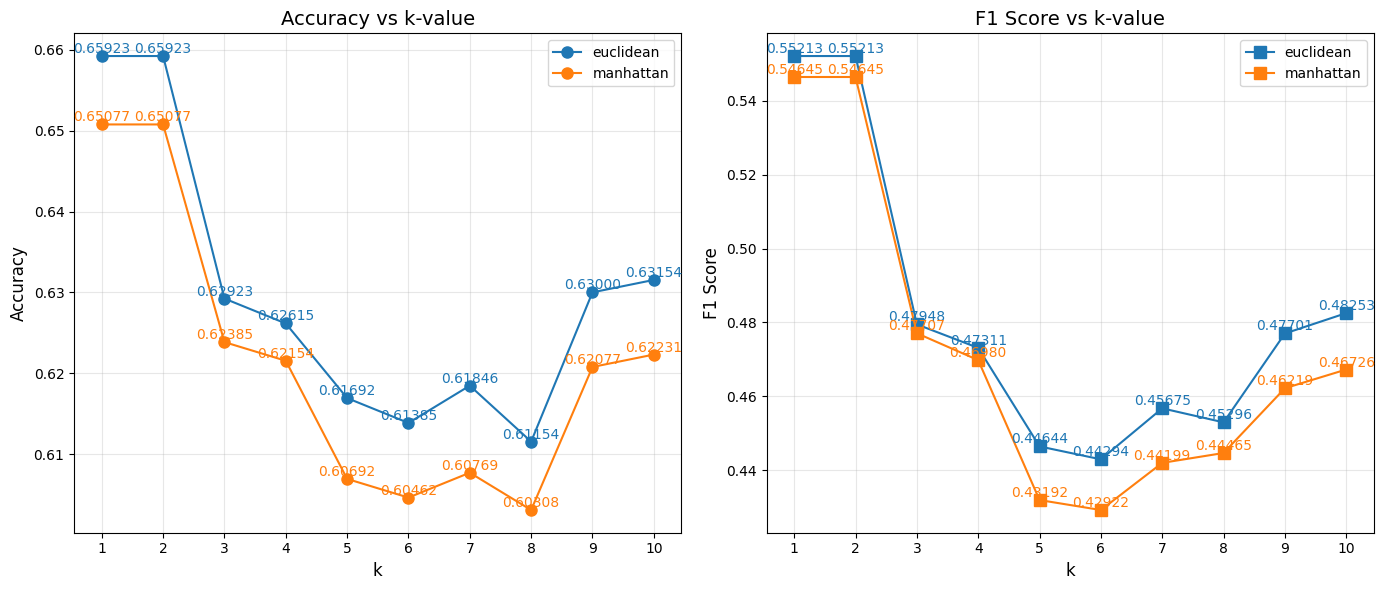

In [ ]:
plt.figure(figsize=(14, 6))

# 1. Accuracy Plot
plt.subplot(1, 2, 1)
for metric in distance_metrics:
    # Line plot
    line = plt.plot(k_values, cv_results[metric]['accuracy'],
                   'o-', label=metric, markersize=8)

    # Annotate each point
    for k, acc in zip(k_values, cv_results[metric]['accuracy']):
        plt.text(k, acc, f'{acc:.5f}',
                ha='center', va='bottom',
                color=line[0].get_color())

plt.xlabel('k', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs k-value', fontsize=14)
plt.xticks(k_values)  # Ensure all k-values show on x-axis
plt.grid(True, alpha=0.3)
plt.legend()

# 2. F1 Score Plot
plt.subplot(1, 2, 2)
for metric in distance_metrics:
    # Line plot
    line = plt.plot(k_values, cv_results[metric]['f1'],
                   's-', label=metric, markersize=8)

    # Annotate each point
    for k, f1 in zip(k_values, cv_results[metric]['f1']):
        plt.text(k, f1, f'{f1:.5f}',
                ha='center', va='bottom',
                color=line[0].get_color())

plt.xlabel('k', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs k-value', fontsize=14)
plt.xticks(k_values)  # Ensure all k-values show on x-axis
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
best_k = {}
for metric in distance_metrics:
    f1_scores = cv_results[metric]['f1']
    max_f1 = max(f1_scores)

    # Get ALL indices with max value
    best_indices = [i for i, x in enumerate(f1_scores) if x == max_f1]
    # Select the largest k among ties (prefer smoother decision boundaries)
    best_idx = max(best_indices)
    best_k[metric] = k_values[best_idx]

    print(f"\n{metric.upper()} analysis:")
    print(f"All F1 scores: {f1_scores}")
    print(f"Max F1: {max_f1:.4f} at k={best_k[metric]}")

best_indices :  [0, 1]

EUCLIDEAN analysis:
All F1 scores: [np.float64(0.5521296438177848), np.float64(0.5521296438177848), np.float64(0.4794794378603866), np.float64(0.473114429882204), np.float64(0.4464386092176203), np.float64(0.44293953591792806), np.float64(0.45675027007445346), np.float64(0.4529554509636826), np.float64(0.4770148266307886), np.float64(0.48252962924405474)]
Max F1: 0.5521 at k=2
best_indices :  [0, 1]

MANHATTAN analysis:
All F1 scores: [np.float64(0.5464538013518865), np.float64(0.5464538013518865), np.float64(0.4770718101746774), np.float64(0.4697993819141374), np.float64(0.4319173036479528), np.float64(0.4292194513754316), np.float64(0.44198997751712366), np.float64(0.4446548004563303), np.float64(0.462191350118934), np.float64(0.4672612887866877)]
Max F1: 0.5465 at k=2


In [ ]:
# Evaluate on test set when k = 1
for metric in distance_metrics:
    y_true = test_data['sentiment'].tolist()
    y_pred = []

    for _, row in test_data.iterrows():
        y_pred.append(knn_classifier(train_data, row['bow'], best_k[metric], metric))

    accuracy, f1, cm = evaluate(y_true, y_pred)

    print(f"\n{metric.upper()} distance (k={best_k[metric]}) Test Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


EUCLIDEAN distance (k=1) Test Results:
Accuracy: 0.6227
F1 Score: 0.5224
Confusion Matrix:
[[ 46   7   0]
 [ 84 148  24]
 [  2   6   9]]

MANHATTAN distance (k=1) Test Results:
Accuracy: 0.6196
F1 Score: 0.5188
Confusion Matrix:
[[ 45   7   1]
 [ 85 148  23]
 [  2   6   9]]


In [ ]:
# Evaluate on test set when k = 2
for metric in distance_metrics:
    y_true = test_data['sentiment'].tolist()
    y_pred = []

    for _, row in test_data.iterrows():
        y_pred.append(knn_classifier(train_data, row['bow'], best_k[metric], metric))

    accuracy, f1, cm = evaluate(y_true, y_pred)

    print(f"\n{metric.upper()} distance (k={best_k[metric]}) Test Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


EUCLIDEAN distance (k=2) Test Results:
Accuracy: 0.6227
F1 Score: 0.5224
Confusion Matrix:
[[ 46   7   0]
 [ 84 148  24]
 [  2   6   9]]

MANHATTAN distance (k=2) Test Results:
Accuracy: 0.6196
F1 Score: 0.5188
Confusion Matrix:
[[ 45   7   1]
 [ 85 148  23]
 [  2   6   9]]
